# Neural Networks CW2: Model Performance Summary

CW2 submission
You are again asked to undertake a deep learning Tensorflow project and report your findings in an html version of a Jupyter notebook. You may develop one of the Topics 5-8 labs or you can extend your first coursework with DLWP part 2 (Topics 5-8) techniques. You can use the datasets mentioned in Deep Learning with Python or you can investigate another dataset.

You can use as much DLWP code as you wish (or anyone else's, as long as you have their permission, or it is in the public domain) - but you must reference all code that is not original. Credit will be awarded for model assembly using standard and third party code and extra credit may be obtained for original code.

Whatever you decide, your project must include at least one of the deep learning techniques from Topics 5, 6 and 8 (DL for computer vision, DL for text and sequences and Generative DL). 

Extra credit is available for the deployment of one or more advanced best practices (Topic 7).

YOU MUST USE TENSORFLOW/KERAS

**Options**

One of
<ol type="1">
   <li>(Standard) Find the best model for a particular dataset using techniques from Topic 5 or Topic 6.</li>
   <li>(Generative) A creative project based on the generative models of DLWP chapter 8 (simply running DLWP code is not enough - you must explore the capability of a generative technique and/or find novel applications)</li>
   <li>(Hyperparameter) Write a hyperparameter optimisation program and test it on a dataset (you MUST write your own optimisation program: DO NOT use hyperparameter optimisation libraries or third party optimisation code)</li>
</ol>

**Submission**
- Reference any pretrained model and all datasets
- Reference any code that is not original
- Reference any other source e.g. books, kaggle
- DO NO INCLUDE DATASETS OR PRETRAINED MODELS OR h5 FILES

Write a structured, readable Jupyter report

Submit a single html version of your Jupiter notebook. Do not submit the notebook, data, saved models, or pretrained networks.


## 1. Introduction

The goal of this project is to determine the best model for the CIFAR-10 dataset from Tensorflow.


### 1.1 The Dataset
The CIFAR-10 dataset is a widely used benchmark dataset in computer vision research, particularly in image classification tasks. It is included as part of the TensorFlow machine learning library and consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The 10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The dataset is split into 50,000 training images and 10,000 testing images. The training set is further divided into five batches of 10,000 images each, while the testing set is one batch of 10,000 images. The dataset is labeled, with each image assigned to one of the 10 classes.

The CIFAR-10 dataset is often used as a benchmark for evaluating the performance of machine learning models in image classification tasks. It is particularly useful for testing the generalization ability of models, as the images are diverse and not limited to a specific domain. Many popular deep learning models, such as convolutional neural networks (CNNs), have been trained on the CIFAR-10 dataset and achieved high accuracies, making it a popular choice for researchers and practitioners alike.

Data Source: https://www.tensorflow.org/datasets/catalog/cifar10

### 1.2 Setup

In this first section we will begin by importing dataset and any necessary packages, and then finally splitting the dataset into training and test datasets before we begin working with the data. 

In [12]:
# Import initial packages

import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

from tensorflow import keras
from keras.models import Sequential, Model
from keras import Input, layers, models
from keras import optimizers

In [3]:
# Hands-on
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
# Import datasets
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data

import tensorflow_datasets as tfds

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 2. Modeling

The Keras functional API is a way of building complex models in Keras by defining a directed acyclic graph of layers. Here are the basic steps to create models using the Keras functional API:

- Import the necessary libraries: tensorflow and keras.

- Define the input shape of the data. This is typically done using the Input layer. For the CIFAR-10 dataset, which has 32x32 color images, the input shape would be (32, 32, 3)


- Define the layers of the model by calling the appropriate layer functions and passing the input or previous layer as an argument. In this model, the first layer is a convolutional layer with 32 filters and a kernel size of 3x3, using 'relu' for activation:

c_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))


- Connect the layers by passing the output of one layer to the input of another. For example, to add a max pooling layer after the convolutional layer, use the MaxPooling2D layer and pass the convolutional layer as the input: In this model, we have 3 such 'units'. The first 'unit' is : 

c_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
c_model.add(layers.MaxPooling2D((2, 2)))

Please notice that the filter size of this unit has been doubled from 32 to 63. Next, the first 'unit' is being connected to two more similar 'units'. Please note that the following two 'units' have doubled filter size (i.e. from 64 to 128) : 

c_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
c_model.add(layers.MaxPooling2D((2, 2)))

- Flatten the output of the last layer and add a fully connected layer with the desired number of neurons. In this model, it is executed with in:

c_model.add(layers.Flatten())
c_model.add(layers.Dense(512, activation='relu'))

- Define the output layer with the appropriate activation function and number of neurons. In this model, which is a multiclass classification, with 10 labels. We use a softmax activation with 10 neurons. So, the last layer in this model (see the following code cell) is defined as: 

    c_model.add(layers.Dense(10, activation='softmax'))
    
- Define the model by passing the input and output layers to the Model constructor:

- Compile the model by specifying the loss function, optimizer, and evaluation metric. This model has 'categorical_crossentropy' loss function, with 'RMSprop(1e-4)' optimizer. The evaluation metrics is 'accuracy':

c_model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(1e-4), 
              metrics=['acc'])
              
- Fit the model to the training data and evaluate its performance on the test data. In the following code cell, this is executed via this line of code :

c_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

The Keras functional API allows for a wide range of model architectures to be built, including multi-input and multi-output models. By defining a directed acyclic graph of layers, the functional API provides a flexible and powerful way to create complex models in Keras.


### 2.1 Model 1: Keras Functional API Model

The first model we will attempt to use is based on a slightly modified version of the Keras functional API model. Given that Keras is authored by François Chollet, I would assumed that this model is approved by François Chollet. (There is a chance that it might be authored by François Chollet.) I named this model as c_model, assuming this is an approved Chollet's model.

The main differences of source model and the modified model here is a) different size layers, b) the addition of a third max_pooling layer. 

Our first model is not particuarly deep. The trainable params is 508,618. We can 'increase' the trainable params of this model by setting the CNN layers with "padding='same'", which would keep the size of the image in (32,32). The current model, without setting "padding='same'" is experiencing a decrease in the image size, from the original (32,32), to 

conv2d (Conv2D)             (30, 30)
conv2d_1 (Conv2D)           (28, 28)
conv2d_2 (Conv2D)           (12, 12)
conv2d_3 (Conv2D)           (4, 4)

If we have set the "padding='same'" hyperparameter in these layers, we could potentially fit more CNN layers with this model. I prefer to respect the model author and decided to keep the original model as much as possible.

I have trained this model with 20 epoch, it has reached: 

77s 61ms/step - loss: 0.4907 - acc: 0.8314 - val_loss: 0.8871 - val_acc: 0.7123

This is still in an underfitting stage, but an accuracy of 83%, with a validation accuracy of 71 percent is respectable for a baseline. This could be trained with more epoch, eg. 30, or 40 to reach the tipping-point between underfitting and overfitting. However, with limited time and computing resources, It is preferrable to explore more models. 

Source: https://www.tensorflow.org/guide/keras/functional

In [4]:
# Model 1: Middling performance after many epochs

c_model = models.Sequential()

c_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

c_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
c_model.add(layers.MaxPooling2D((2, 2)))

c_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
c_model.add(layers.MaxPooling2D((2, 2)))

c_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
c_model.add(layers.MaxPooling2D((2, 2)))

c_model.add(layers.Flatten())
c_model.add(layers.Dense(512, activation='relu'))
c_model.add(layers.Dense(10, activation='softmax'))

c_model.summary()

# optimizer='rmsprop', 1e-4, binary_crossentropy
# loss='binary_crossentropy
c_model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(1e-4), 
              metrics=['acc'])

# validation_split=0.2 is added during model fitting 
c_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

# cnn vs dnn: 
# one is preferred for image processing
# ch 5, 14

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         1

### 2.2 Model 2: 

Source: 

The source of the second model is: 
    
https://github.com/ageron/handson-ml3/blob/main/14_deep_computer_vision_with_cnns.ipynb

This github page is a companion for 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow', authored by Aurélien Geron. 

Aurélien Geron's book is another best-seller in this field. This model is taken from chapter 14 from his github site, which should be part of the book's 3rd edition. 

Some minor adjustment's been done to the original model. 
1. Original model has specified "kernel_size=7" in first CNN layer
2. Original model has been compiled with "sparse_categorical_crossentropy" loss function

I have adjusted these so that the modified model can be more similar to the first model (i.e. c_model), and I have named the second model as 'G_model' which implied that it is authored by Aurélien Geron. 

The G_model has been trained for 20 epoch, just as many times as the c_model. The perfomance of this model is very impressive: 

Epoch 20/20
1250/1250 [==============================] - 148s 119ms/step - loss: 0.0946 - accuracy: 0.9700 - val_loss: 1.4027 - val_accuracy: 0.7560

It has reached an accuracy of 97% for training, and 75% for validation. 

On the surface, this model is not that much deeper than c_model. The major difference I noticed is that G_model has 2 CNN layers for each MaxPooling layer. The filter size is 64, 128, 128, 256, 256 (in comparsion to 32, 64, 128, 128) which means that the trainable params of the G_model would be substantially higher.  

In explaining the growing number of filters, Geron worte:  

'since the number of low level features is often fairly low (e.g., small circles, horizontal lines, etc.), but there are many different ways to combine them into higher level features. It is a common practice to double the number of filters after each pooling layer: since a pooling layer divides each spatial dimension by a factor of 2, we can afford doubling the number of feature maps in the next layer, without fear of exploding the number of parameters, memory usage, or computational load.'

Given this advice, I tried to turbo-charge the first model (i.e. c_model). I have attempted to set 'padding="same"' in the c_model, add CNN layers and increase the filter size. However, I failed to increase the accuracy of the c_model anywhere close to the G_model. 

The second interesting point about the G_model is its kernel_initializer, which has been set to "he_normal" for 3 times. (please see the code cell below) Presumably, there is a good reason for overriding the default kernel_initializer 3 times. I attempted to read through the Keras documentation on Layer weight initializers. It turns out that there are quite a number of built-in initializers. However, the documentation only gives a brief explanation as: 

'It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.' (source: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal)

Geron has set the kernel_initializer to "he_normal" in a number of the models in his book. There was no detaild discussion about 'he_normal' in the book's second edition. I wish I would have more computing resources and time to understand the impact of "he_normal" kernel_initializer on the model. But we have to move on to yet another interesting point about this model. 

G_model has created 'DefaultConv2D', a wrapper with default hyperparamters by using the partial function from Python functools. 'DefaultConv2D' sets default values on kernel_size, padding, activation and kernel_initializer in the partial function. 

DefaultConv2D = partial(tf.keras.layers.Conv2D, 
                        kernel_size=3, 
                        padding="same",
                        activation="relu", 
                        kernel_initializer="he_normal")
                        
The G_model is built with layers of 'DefaultConv2D', whereas the c_model is built with layers of 'Conv2D'. By building with this wrapper, the G_model has deceptively clean code. 

In [5]:
# Model 2: Good performance

from functools import partial

tf.random.set_seed(42)  # extra code – ensures reproducibility
DefaultConv2D = partial(tf.keras.layers.Conv2D, 
                        kernel_size=3, 
                        padding="same",
                        activation="relu", 
                        kernel_initializer="he_normal") # why 'he_normal'??
# original model has specified "kernel_size=7" in first CNN layer
G_model = tf.keras.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),  # why 'he_normal'??
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),  # why 'he_normal'??
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

# original model has been compiled with "sparse_categorical_crossentropy"
G_model.compile(loss="categorical_crossentropy", 
              optimizer="nadam",
              metrics=["accuracy"])
history = G_model.fit(x_train, y_train, epochs=20, validation_split=0.2)
score = G_model.evaluate(x_test, y_test)


Epoch 1/20
1250/1250 [==============================] - 201s 156ms/step - loss: 1.4006 - accuracy: 0.4946 - val_loss: 1.0376 - val_accuracy: 0.6288
Epoch 2/20
1250/1250 [==============================] - 202s 162ms/step - loss: 0.9158 - accuracy: 0.6794 - val_loss: 0.8366 - val_accuracy: 0.7069
Epoch 3/20
1250/1250 [==============================] - 187s 150ms/step - loss: 0.7115 - accuracy: 0.7497 - val_loss: 0.7845 - val_accuracy: 0.7262
Epoch 4/20
1250/1250 [==============================] - 192s 153ms/step - loss: 0.5578 - accuracy: 0.8054 - val_loss: 0.7841 - val_accuracy: 0.7377
Epoch 5/20
1250/1250 [==============================] - 184s 147ms/step - loss: 0.4352 - accuracy: 0.8482 - val_loss: 0.8130 - val_accuracy: 0.7501
Epoch 6/20
1250/1250 [==============================] - 184s 147ms/step - loss: 0.3312 - accuracy: 0.8839 - val_loss: 0.8518 - val_accuracy: 0.7444
Epoch 7/20
1250/1250 [==============================] - 184s 147ms/step - loss: 0.2657 - accuracy: 0.9075 - val_

### 2.3 Model 2.1: With batch normalization

Model 2.1 is my humble attempt to 'improve' the Geron's G_model. It has reached an accuracy of 0.9828 in 20 epoch. The not-so-secret sauce is batch normalization. Five layers of 'keras.layers.BatchNormalization()' have been added to the G_model (marked as '# BN added' in the code cell below). 

In [ ]:
from functools import partial

tf.random.set_seed(42)  # extra code – ensures reproducibility
DefaultConv2D = partial(tf.keras.layers.Conv2D, 
                        kernel_size=3, 
                        padding="same",
                        activation="relu", 
                        kernel_initializer="he_normal")
G_BN_model = tf.keras.Sequential([
    DefaultConv2D(filters=64, input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(), # BN added
    keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(), # BN added
    DefaultConv2D(filters=128),
    keras.layers.BatchNormalization(), # BN added
    keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    keras.layers.BatchNormalization(), # BN added
    DefaultConv2D(filters=256),
    keras.layers.BatchNormalization(), # BN added
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    #tf.keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    #tf.keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation="softmax")
])

G_BN_model.compile(loss="categorical_crossentropy", 
              optimizer="nadam",
              metrics=["accuracy"])
history = G_BN_model.fit(x_train, y_train, epochs=20, validation_split=0.2)
score = G_BN_model.evaluate(x_test, y_test)

Batch normalization is a technique used in machine learning to improve the performance of deep neural networks. It is a method for normalizing the activations in a neural network by adjusting and scaling the inputs in each layer.

The idea behind batch normalization is to ensure that the input to each layer has a mean of zero and a standard deviation of one. By doing so, it helps to prevent the activations in each layer from becoming too large or too small, which can lead to poor network performance.

The process of batch normalization involves normalizing the input to a layer over a mini-batch of training examples. The normalization is applied to each input feature independently, which allows for the network to learn a more stable and consistent representation of the data.

There are several benefits to using batch normalization in neural networks, including:

- Improved training speed: By normalizing the inputs to each layer, batch normalization reduces the amount of internal covariate shift, which helps to speed up the training process.

- Improved network performance: Batch normalization can help to prevent overfitting and improve the generalization performance of a network, which can lead to better accuracy on new data.

- Improved gradient flow: By ensuring that the activations in each layer have a similar scale, batch normalization helps to improve the flow of gradients through the network, which can help to prevent the vanishing or exploding gradient problem.

- Overall, batch normalization is a powerful technique for improving the performance of neural networks, and it is commonly used in many state-of-the-art models.

### 2.4 Model 3: 

The next model is Depthwise Separable Convolution, from chapter 7 of François Chollet's "Deep Learning with Python". The model here is named as DSC_model, which is short for Depthwise Separable Convolution. The adjustment I made to Chollet's Depthwise Separable Convolution model is the height and width of the image, which has been reduced from (64,64) to (32,32) as the CIFAR-10 dataset images are (32,32). 

The first attemp was a re-run of Chollet's original model. However, the accuracy score is surprisingly low after 15 epoch. The filter size of the original model was increased from [32, 64, 64, 128, 64, 128], to [32, 64, 128, 128, 256, 256]. However, the accuracy score of this model remains shockingly low (i.e. 9.85 %) after 20 epoch. (Please see the enclosed code cell below)

1250/1250 [==============================] - 34s 28ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.0952

The Depthwise Separable Convolution model, as introduced by Chollet in chapter 7, is conceptually very appealing. According to Chollet, separableConv2D layers is an excellent replacement of Conv2D. Given that it 'performs a spatial convolution on each channel of its input, independently, before mixing output channels via a pointwise convolution', separableConv2D is a 'more representationally efficient way to perform convlution than Conv2D. 

A similar description of SeparableConv2D can be found from tensorflow API documentation: 

'Separable convolutions consist of first performing a depthwise spatial convolution (which acts on each input channel separately) followed by a pointwise convolution which mixes the resulting output channels. The depth_multiplier argument controls how many output channels are generated per input channel in the depthwise step.
Intuitively, separable convolutions can be understood as a way to factorize a convolution kernel into two smaller kernels, or as an extreme version of an Inception block.' Source: https://www.tensorflow.org/api_docs/python/tf/keras/layers/SeparableConv2D 

I am absolutely clueless of the poor performance of Model 3. Chollet mentioned that the Xception architecture has depthwise separable convolutions as its basis. I noticed that in chapter 14 of 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow', Geron mentioned that 'Xception architecture starts with 2 regular convolutional layers, but then the rest of the architecture uses only separable convolutions (34 in ll), plus a few max pooling layers and the usual final layers (a global average pooling layer, and a dense output layer). My ultra-low performaning, so-called DSC_model has 6 SeparableConv2D layers, but no regular Conv2D. Instead of trying to speculate what went wrong with Model 3 or re-build an Xception model from scratch, let's take advantage of Keras Applications, which features a wide range of deep learning models with pre-trained weights. 

____________________ original text from chapter 7 ___________________________-
DEPTHWISE SEPARABLE CONVOLUTION
What if I told you that there’s a layer you can use as a drop-in replacement for Conv2D
that will make your model lighter (fewer trainable weight parameters) and faster
(fewer floating-point operations) and cause it to perform a few percentage points better on its task? That is precisely what the depthwise separable convolution layer does
(SeparableConv2D). This layer performs a spatial convolution on each channel of its
input, independently, before mixing output channels via a pointwise convolution (a
1 × 1 convolution), as shown in figure 7.16. This is equivalent to separating the learning of spatial features and the learning of channel-wise features, which makes a lot of
sense if you assume that spatial locations in the input are highly correlated, but different channels are fairly independent. It requires significantly fewer parameters and
involves fewer computations, thus resulting in smaller, speedier models. And because
it’s a more representationally efficient way to perform convolution, it tends to learn
better representations using less data, resulting in better-performing models.
These advantages become especially important when you’re training small models
from scratch on limited data. For instance, here’s how you can build a lightweight,
depthwise separable convnet for an image-classification task (softmax categorical classification) on a small dataset

In [7]:
# Model 3: DSC Model: Extremely poor performance

'''
REMARKS: 
The original model has ultra low accuracy score. (Less than 0.25) for 15 epoch. 
Why?????
This CNN is much smaller than Model_2, more comparable to Model_1. 
1) deepen this model, smiliar to Model_2, by
    * adding another stack of layers with 256 filters (i.e. 2 (256) SeparableConv2D + 1 GlobalAveragePooling2D)
'''

height = 32
width = 32
channels = 3
num_classes = 10

DSC_model = Sequential()
DSC_model.add(layers.SeparableConv2D(32, 3, activation='relu', input_shape=(height, width, channels,)))
DSC_model.add(layers.SeparableConv2D(64, 3, activation='relu'))
DSC_model.add(layers.MaxPooling2D(2))

DSC_model.add(layers.SeparableConv2D(128, 3, activation='relu'))
DSC_model.add(layers.SeparableConv2D(128, 3, activation='relu'))
DSC_model.add(layers.MaxPooling2D(2))

DSC_model.add(layers.SeparableConv2D(256, 3, activation='relu'))
DSC_model.add(layers.SeparableConv2D(256, 3, activation='relu'))
DSC_model.add(layers.GlobalAveragePooling2D())

DSC_model.add(layers.Dense(32, activation='relu'))
DSC_model.add(layers.Dense(num_classes, activation='softmax'))

DSC_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])
history = DSC_model.fit(x_train, y_train, epochs=20, validation_split=0.2)
score = DSC_model.evaluate(x_test, y_test)

Epoch 1/20
1250/1250 [==============================] - 35s 27ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 2/20
1250/1250 [==============================] - 33s 27ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1014
Epoch 3/20
1250/1250 [==============================] - 33s 26ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 4/20
1250/1250 [==============================] - 33s 26ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 5/20
1250/1250 [==============================] - 33s 26ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 6/20
1250/1250 [==============================] - 33s 26ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 7/20
1250/1250 [==============================] - 33s 27ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 -

Model 4: Xception, *transfer learning

Source : https://keras.io/api/applications/#usage-examples-for-image-classification-models
Model 4: Xception

Xception, topping the table of all the available pre-trained model in Keras Applications, is exceptionally attractive. It is far from 'deep', given its depth of 81 layers. All other models, with the exception of VGG16, VGG19 and MobileNet, have more layers than Xception. Indeed, the really deep ones have over 400 layers, such as InceptionResNetV2 (a depth of 449) or NASNetLarge (depth of 533). Yet, it's accuracy is very respectable. It reaches 79.0% for Top-1 Accuracy, whereas NASNetLarge is 82.5% and InceptionResNetV2 is 80.3%. 

Behind the many models of Keras Applications, is the concept of 'Transfer Learning'. The following writing is based upon a developer guide, namely 'Transfer learning & fine-tuning', authored by François Chollet (source: https://keras.io/guides/transfer_learning/)

'Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.'

The workflow of transfer learning has 4 steps, with fine-tuning as the 5th optional step:

1. Take layers from a previously trained model.
2. Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
3. Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
4. Train the new layers on your dataset.

I am following Chollet's workflow to instantiate Xception. The input_shape of keras.applications.Xception is (150, 150, 3). Given that the CIFAR-10 dataset is only (32, 32, 3), I attempted to replace the 'input_shape=(150, 150, 3)' with 'input_shape=(32, 32, 3)'. The attempt failed and the error message was: 

Input size must be at least 71x71; Received: input_shape=(32, 32, 3)

I am fascinated by Xception and the promise of 'Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.' (source: Transfer learning & fine-tuning). If 'too little data' is not going to be an issue, let's try out the 'tf_flower' dataset, which is featuered in another related tutorial, namely 'Retraining an Image Classifier' (https://www.tensorflow.org/hub/tutorials/tf2_image_retraining). It is also used in Chapter 14 of Geron's 



In [27]:
flowers_ds, info = tfds.load('tf_flowers', split='train', with_info=True)

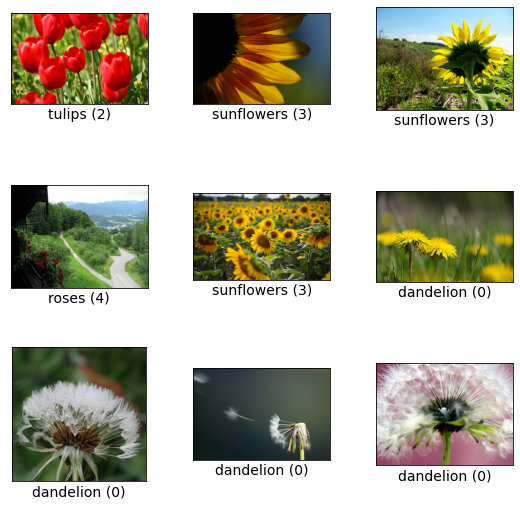

(333, 500, 3) tf.Tensor(2, shape=(), dtype=int64)
(212, 320, 3) tf.Tensor(3, shape=(), dtype=int64)
(240, 320, 3) tf.Tensor(3, shape=(), dtype=int64)
(240, 320, 3) tf.Tensor(4, shape=(), dtype=int64)
(317, 500, 3) tf.Tensor(3, shape=(), dtype=int64)
(212, 320, 3) tf.Tensor(0, shape=(), dtype=int64)
(240, 240, 3) tf.Tensor(0, shape=(), dtype=int64)
(333, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(240, 320, 3) tf.Tensor(0, shape=(), dtype=int64)
(240, 320, 3) tf.Tensor(1, shape=(), dtype=int64)
(240, 159, 3) tf.Tensor(3, shape=(), dtype=int64)
(332, 500, 3) tf.Tensor(2, shape=(), dtype=int64)
(250, 320, 3) tf.Tensor(4, shape=(), dtype=int64)
(375, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(213, 320, 3) tf.Tensor(2, shape=(), dtype=int64)
(270, 320, 3) tf.Tensor(1, shape=(), dtype=int64)
(240, 182, 3) tf.Tensor(1, shape=(), dtype=int64)
(266, 320, 3) tf.Tensor(2, shape=(), dtype=int64)
(200, 320, 3) tf.Tensor(3, shape=(), dtype=int64)
(234, 240, 3) tf.Tensor(3, shape=(), dtype=int64)


In [28]:
tfds.show_examples(flowers_ds, info)
for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  image = example["image"]
  label = example["label"]
  print(image.shape, label) #check image size, must be > (75, 75)

After checking the size of the 'tf_flowers' dataset. I believe the flower images can be cropped to (150, 150, 3), to match the input shape of Xception. 

I am shadowing the procedure in the session of 'An end-to-end example: fine-tuning an image classification model on a cats vs. dogs dataset' in the "Transfer learning & fine-tuning" Developer Guide. However, the 'cats_vs_dogs' dataset is being replaced by the 'tf_flowers' dataset. All codes (and comments) are authored by Chellot (source: 'https://keras.io/guides/transfer_learning/'), with minor adaptions to fit the 'tf_flowers' dataset from this writer.

In [22]:
'''
First workflow code
https://keras.io/api/applications/

'''
# step 1: instantiate a base model with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3), 
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [29]:
#import tensorflow_datasets as tfds

tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load(
    "tf_flowers", # original code: "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds))
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Number of training samples: 1468
Number of validation samples: 367
Number of test samples: 367


Chollet performed normalization and standardization (of image sizes) on the "cats_vs_dogs" dataset before model fitting. Given that the "tf_flowers" dataset has images of various sizes, it would be resized in the data pipeline to (150,150) as well. 

Let's run Chollet's image resizing code first. 

In [51]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

After resizing, Chollet set the batch size to 32. To optimize loading speed, he cache and prefetch the data with a buffer_size of 10. We would follow all Chollet's steps.

In [52]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

Chollet also perform data augmentation during the preprocessing stage. However, this data augmentation code is relatively simple. He has only use 2 image augmenation layers, namely 'layers.RandomFlip' and 'layers.RandomRotation'. 

(Source: https://keras.io/api/layers/preprocessing_layers/)
The Keras Preprocessing layers is very rich API. It provides different layers for different data types. For images, it has two types of layers. One for preprocessing and one for augmentation. 

The image preprocessing layers has 3 layers: 

* Resizing layer
* Rescaling layer
* CenterCrop layer

The image augmentation layers has 9 layers:

* RandomCrop layer
* RandomFlip layer
* RandomTranslation layer
* RandomRotation layer
* RandomZoom layer
* RandomHeight layer
* RandomWidth layer
* RandomContrast layer
* RandomBrightness layer

Given that there is a built-in Resizing layer, I can't help but wonder why Chollet resize the "cats_vs_dogs" images with the following lamda function. 

train_ds.map(lambda x, y: (tf.image.resize(x, size)

In addition, the 'RandomCrop layer', 'CenterCrop layer' seems to be ideal layers for cropping the 'tf_flowers'.  

However, we would execute Chollet's code first. 

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), 
     layers.RandomRotation(0.1),]
)

In [33]:
# data_augmentation_2 was not used during model building
data_augmentation_2 = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [54]:
# step 2: freeze the base model
base_model.trainable = False

In [55]:
# step 3: Create a new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
# outputs = keras.layers.Dense(1)(x) # original code
outputs = keras.layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_9   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                           

Given that the model compilation code for Chollet's binary "cats_vs_dogs" dataset is not applicable to the 'tf_flowers" dataset, which has 5 categories, it would be replaced. Enclosed down below is original Chollet code for model compilation. 

'''
model.compile(optimizer=keras.optimizers.Adam(),              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(train_ds, epochs=5, validation_data=validation_ds)
'''

The model compilation code in the next code cell is authored by Aurélien Geron. (Source: https://github.com/ageron/handson-ml3/blob/main/14_deep_computer_vision_with_cnns.ipynb). 

The Geron model has not specified input shape. but Geron has resize the images with the Resizing layer and set the image to (224, 224) and 'crop_to_aspect_ratio' is set to 'True' in his preprocessing pipeline. His data_augmentation has called 3 different layers: RandomFlip, RandomRotation, RandomContrast. None of these was adopted by Chollet. As Geron's data preprocessing pipeline is quite different from Chollet, his code would be run in full in the next code cell. 


In [57]:
# original Geron code, with Xception 

test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

tf.keras.backend.clear_session()  # extra code – resets layer name counter

batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

In [61]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(5, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [62]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
86/86 [==============================] - 1879s 22s/step - loss: 0.6464 - accuracy: 0.7874 - val_loss: 5.4324 - val_accuracy: 0.4737
Epoch 2/3
86/86 [==============================] - 2159s 25s/step - loss: 0.3608 - accuracy: 0.8819 - val_loss: 3.5051 - val_accuracy: 0.4846
Epoch 3/3
86/86 [==============================] - 2207s 26s/step - loss: 0.2527 - accuracy: 0.9233 - val_loss: 1.1425 - val_accuracy: 0.7296


In [65]:
# score_Xception = model.evaluate(x_test, y_test)
print(history)

The Xception model is hitting an accuracy of 92.33% in just 3 epoch. 

As different convnet architectures has different learned features, finding the one that is close to the dataset. 



In [ ]:
# original Geron code, replace Xception with InceptionV3

In [66]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

tf.keras.backend.clear_session()  # extra code – resets layer name counter

batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

In [67]:
base_model = tf.keras.applications.InceptionV3(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(5, activation="softmax")(avg)
model_InceptionV3 = tf.keras.Model(inputs=base_model.input, outputs=output)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model_InceptionV3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history_InceptionV3 = model_InceptionV3.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
86/86 [==============================] - 1104s 13s/step - loss: 2.2357 - accuracy: 0.2544 - val_loss: 30069822.0000 - val_accuracy: 0.1833
Epoch 2/3
86/86 [==============================] - 1500s 17s/step - loss: 1.6601 - accuracy: 0.2318 - val_loss: 108.2578 - val_accuracy: 0.2414
Epoch 3/3
86/86 [==============================] - 1604s 19s/step - loss: 1.6154 - accuracy: 0.2267 - val_loss: 11.5203 - val_accuracy: 0.2323


In [68]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

tf.keras.backend.clear_session()  # extra code – resets layer name counter

batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

In [ ]:
base_model = tf.keras.applications.ResNet50(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(5, activation="softmax")(avg)
model_ResNet50 = tf.keras.Model(inputs=base_model.input, outputs=output)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model_ResNet50.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history_ResNet50 = model_ResNet50.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
72/86 [========================>.....] - ETA: 7:58 - loss: 4.5912 - accuracy: 0.2669

In [ ]:
9:00pm
optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9)